In [1]:
import numpy as np
import pandas as pd
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = '{:,.2f}'.format

In [2]:
netflix = pd.read_csv('./training/netflix_titles.csv')

print(f'DataFrame Details\n')
print(f'Total Rows: {netflix.shape[0]}\nTotal Columns: {netflix.shape[1]}')
display(netflix.head())

DataFrame Details

Total Rows: 7787
Total Columns: 12


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#### Data processing

In [3]:
# remove NaN
netflix = netflix.drop(netflix[netflix.isnull().any(axis=1)].index)

# add column for year added and age
netflix['year_added'] = netflix['date_added'].apply(lambda x: str(x)[-4:])
netflix['year_added'] = netflix['year_added'].astype('int64')
netflix['show_age'] = 2021 - netflix['year_added']
netflix['show_age'] = netflix['show_age'].apply(lambda x: str(x)+' year(s)')

# drop extra columns
netflix.drop(['show_id','date_added','release_year','description'],axis=1,inplace=True)

print('Data processing done')
display(netflix.head())

Data processing done


,type,title,director,cast,country,rating,duration,listed_in,year_added,show_age
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,"Dramas, International Movies",2016,5 year(s)
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,"Horror Movies, International Movies",2018,3 year(s)
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",2017,4 year(s)
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,Dramas,2020,1 year(s)
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",2017,4 year(s)


#### Data Analysis

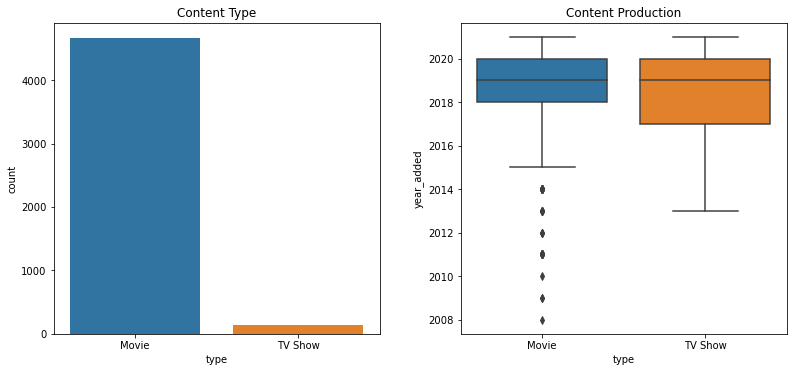

In [4]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
fig.tight_layout(pad=5)

sns.countplot(data=netflix,x='type',ax=ax[0])
ax[0].set_title('Content Type')
sns.boxplot(x='type',y='year_added',data=netflix,ax=ax[1])
ax[1].set_title('Content Production')
plt.show()

<AxesSubplot:title={'center':'Content Age'}>

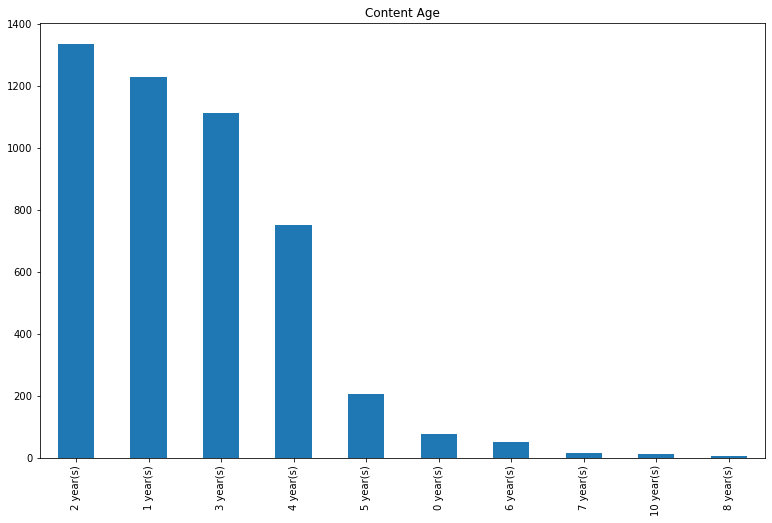

In [5]:
age = netflix['show_age'].value_counts()[:10]
age.plot(kind='bar',title='Content Age',figsize=(13,8))

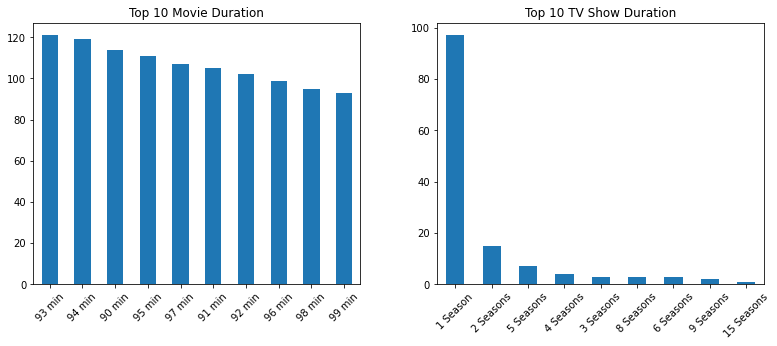

In [6]:
plt.figure(figsize=(12,6))
types = list(netflix.type.unique())

for i in range(len(types)):
    plt.subplot(1,2,i+1)
    if types[i] == 'Movie':
        movies = netflix[netflix.type == types[i]]
        movies = movies.duration.value_counts()[:10]
        movies.plot(kind='bar')
    elif types[i] == 'TV Show':
        tv_show = netflix[netflix.type == types[i]]
        tv_show = tv_show.duration.value_counts()[:10]
        tv_show.plot(kind='bar')
    plt.title(f'Top 10 {types[i]} Duration')
    plt.xticks(rotation=45)
    
plt.tight_layout(pad=5)

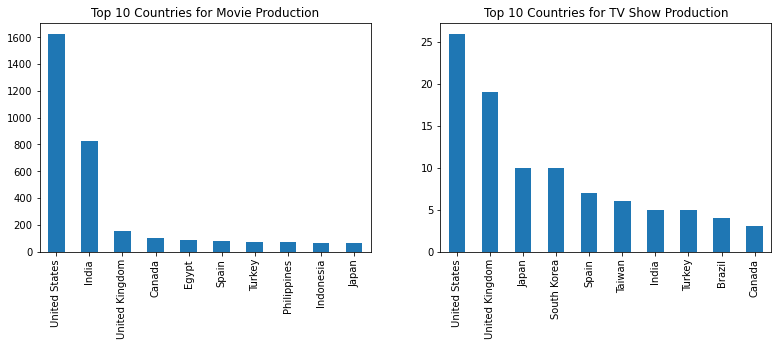

In [7]:
plt.figure(figsize=(12,6))

for i in range(len(types)):
    plt.subplot(1,2,i+1)
    if types[i] == 'Movie':
        movies = netflix[netflix.type == 'Movie']
        movies = movies.country.value_counts()[:10]
        movies.plot(kind='bar',title=f'Top 10 Countries for {types[i]} Production')
    elif types[i] == 'TV Show':
        tv_show = netflix[netflix.type == 'TV Show']
        tv_show = tv_show.country.value_counts()[:10]
        tv_show.plot(kind='bar',title=f'Top 10 Countries for {types[i]} Production')

plt.tight_layout(pad=5)

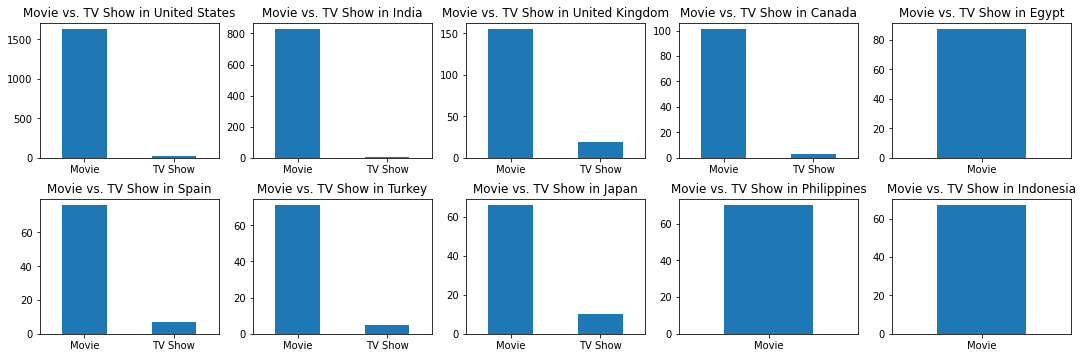

In [8]:
plt.figure(figsize=(15,5))

countries = netflix.country.value_counts()[:10].index
for i in range(len(countries)):
    plt.subplot(2,5,i+1)
    x = netflix[netflix.country == countries[i]]
    x = x.type.value_counts()
    x.plot(kind='bar')
    plt.title(f'Movie vs. TV Show in {countries[i]}')
    plt.xticks(rotation=360)
    
plt.tight_layout(pad=.8)

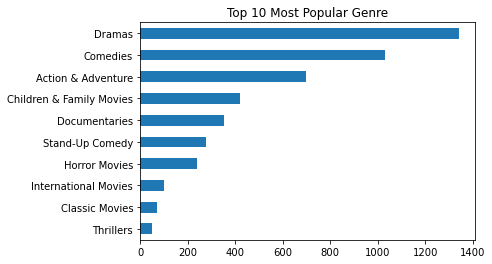

In [9]:
nflx = netflix.copy()
nflx['listed_in'] = nflx['listed_in'].apply(lambda x: x.split(',')[0])

genre = nflx.listed_in.value_counts()[:10]
genre.sort_values().plot(kind='barh',title='Top 10 Most Popular Genre')
plt.show()